<a href="https://colab.research.google.com/github/sree-hitha/sreehitha/blob/main/cerditcard_fraud_ditection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Information Gathering

import pandas as pd
import numpy as np
from datetime import datetime

# Load dataset
df = pd.read_csv("/content/Credit_Card_Fraud.csv")

# (a) Check for NULL values
print("NULL Values in dataset:\n", df.isnull().sum())

# (b) Derive Age from dob
# Convert dob to datetime
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

# Current year for age calculation
current_year = datetime.now().year
df['age'] = current_year - df['dob'].dt.year

# (c) Shape of dataframe
print("\nShape of dataframe:", df.shape)

# Display first few rows with new Age column
print("\nSample Data with Age column:\n", df[['dob', 'age']].head())


NULL Values in dataset:
 trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               1
is_fraud                 1
dtype: int64

Shape of dataframe: (98113, 16)

Sample Data with Age column:
          dob  age
0 1978-06-21   47
1 1962-01-19   63
2 1945-12-21   80
3 1967-08-30   58
4 1967-08-02   58


2. List all the merchants who are fraud along with their DoB and fraud count

In [ ]:
# Filter for fraudulent transactions
fraudulent_merchants = df[df['is_fraud'] == 1]

# Group by merchant and dob and count occurrences
fraud_merchant_counts = fraudulent_merchants.groupby(['merchant', 'dob']).size().reset_index(name='fraud_count')

# Display the result
display(fraud_merchant_counts)

,merchant,dob,fraud_count
0,Abbott-Rogahn,1983-06-13,1
1,Abbott-Rogahn,1989-07-17,1
2,Abernathy and Sons,1940-09-13,1
3,"Adams, Kovacek and Kuhlman",1965-11-11,1
4,"Altenwerth, Cartwright and Koss",1945-12-21,1
...,...,...,...
573,Wolf Inc,1996-04-04,1
574,"Zboncak, Rowe and Murazik",1967-01-24,1
575,"Zboncak, Rowe and Murazik",1981-07-05,1
576,Zemlak Group,1959-03-31,1


from matplotlib import pyplot as plt
fraud_merchant_counts['fraud_count'].plot(kind='hist', bins=20, title='fraud_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dob']
  ys = series['fraud_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = fraud_merchant_counts.sort_values('dob', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dob')
_ = plt.ylabel('fraud_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['dob']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'dob'}, axis=1)
              .sort_values('dob', ascending=True))
  xs = counted['dob']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = fraud_merchant_counts.sort_values('dob', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dob')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
fraud_merchant_counts['fraud_count'].plot(kind='line', figsize=(8, 4), title='fraud_count')
plt.gca().spines[['top', 'right']].set_visible(False)

3. If the merchant ‘Welch Inc’ is fraud then display all the features and transactions of this merchant

In [ ]:
# Check if 'Welch Inc' is in the fraudulent_merchants list
if 'Welch Inc' in fraudulent_merchants['merchant'].unique():
    print("Welch Inc is associated with fraudulent transactions.")
    # Filter the original dataframe for 'Welch Inc'
    welch_inc_transactions = df[df['merchant'] == 'Welch Inc']
    # Display all features and transactions for this merchant
    display(welch_inc_transactions)
else:
    print("Welch Inc is not associated with any fraudulent transactions in this dataset.")

Welch Inc is associated with fraudulent transactions.


,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,age
3732,2019-01-13 03:25:29,Welch Inc,misc_net,46.93,Superior,AZ,33.2887,-111.0985,2872,Petroleum engineer,1987-10-28,5937e13248eaa9243ced9222ad7ffc7b,33.387878,-112.003740,0.0,38
4259,2019-01-14 14:13:39,Welch Inc,misc_net,1.51,Conway,WA,48.3400,-122.3456,85,"Research officer, political party",1984-09-01,f7411ed2bb9face7ce5da467ac504549,48.468928,-122.743000,0.0,41
5628,2019-01-19 01:12:04,Welch Inc,misc_net,9.28,Gardiner,OR,43.7857,-124.1437,260,"Engineer, maintenance",1956-09-01,b781ed7afa4f15f1b9c496c566ac9c84,44.751781,-123.856055,0.0,69
6740,2019-01-22 06:03:17,Welch Inc,misc_net,3.50,Yellowstone National Park,WY,44.7957,-110.6137,369,Materials engineer,1941-11-16,37acbcd312b4ee9b70c2abbf8ae8afb3,44.997444,-110.111307,0.0,84
9540,2019-01-31 09:09:01,Welch Inc,misc_net,3.15,Cascade Locks,OR,45.6710,-121.8686,1288,Barrister,1936-05-01,dbda6b65a84c2a7dbe0ad5bbe31f8c5b,45.021819,-121.974762,0.0,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93151,2019-08-08 07:21:01,Welch Inc,misc_net,5.58,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,ef1ab5af748e76bf8d5d3d7b93704ed8,33.114137,-104.958947,0.0,58
94585,2019-08-11 03:18:08,Welch Inc,misc_net,8.26,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,c0400cae95609d0c866b3f13877193a6,43.724379,-110.050614,0.0,58
95244,2019-08-12 00:39:12,Welch Inc,misc_net,164.84,Thompson,UT,38.9999,-109.6150,46,"Surveyor, minerals",1987-04-23,242c62a3d01ffdb69f4c62bb13cf9104,38.544883,-110.508361,0.0,38
96010,2019-08-13 07:01:56,Welch Inc,misc_net,3.83,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,89e50532e6b2c9a2b544f7033d86488a,41.141512,-121.689389,0.0,80


from matplotlib import pyplot as plt
welch_inc_transactions['amt'].plot(kind='hist', bins=20, title='amt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
welch_inc_transactions['lat'].plot(kind='hist', bins=20, title='lat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
welch_inc_transactions['long'].plot(kind='hist', bins=20, title='long')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
welch_inc_transactions['city_pop'].plot(kind='hist', bins=20, title='city_pop')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
welch_inc_transactions.plot(kind='scatter', x='amt', y='lat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
welch_inc_transactions.plot(kind='scatter', x='lat', y='long', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
welch_inc_transactions.plot(kind='scatter', x='long', y='city_pop', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
welch_inc_transactions.plot(kind='scatter', x='city_pop', y='merch_lat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dob']
  ys = series['amt']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = welch_inc_transactions.sort_values('dob', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dob')
_ = plt.ylabel('amt')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dob']
  ys = series['lat']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = welch_inc_transactions.sort_values('dob', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dob')
_ = plt.ylabel('lat')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dob']
  ys = series['long']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = welch_inc_transactions.sort_values('dob', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dob')
_ = plt.ylabel('long')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dob']
  ys = series['city_pop']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = welch_inc_transactions.sort_values('dob', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dob')
_ = plt.ylabel('city_pop')

from matplotlib import pyplot as plt
welch_inc_transactions['amt'].plot(kind='line', figsize=(8, 4), title='amt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
welch_inc_transactions['lat'].plot(kind='line', figsize=(8, 4), title='lat')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
welch_inc_transactions['long'].plot(kind='line', figsize=(8, 4), title='long')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
welch_inc_transactions['city_pop'].plot(kind='line', figsize=(8, 4), title='city_pop')
plt.gca().spines[['top', 'right']].set_visible(False)

4. If the merchant ‘Romaguera, Cruickshank and Greenholt’ is fraud then display all the features of this merchant

In [ ]:
# Check if 'Romaguera, Cruickshank and Greenholt' is in the fraudulent_merchants list
if 'Romaguera, Cruickshank and Greenholt' in fraudulent_merchants['merchant'].unique():
    print("Romaguera, Cruickshank and Greenholt is associated with fraudulent transactions.")
    # Filter the original dataframe for 'Romaguera, Cruickshank and Greenholt'
    romaguera_transactions = df[df['merchant'] == 'Romaguera, Cruickshank and Greenholt']
    # Display all features and transactions for this merchant
    display(romaguera_transactions)
else:
    print("Romaguera, Cruickshank and Greenholt is not associated with any fraudulent transactions in this dataset.")

Romaguera, Cruickshank and Greenholt is associated with fraudulent transactions.


,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,age
60,2019-01-01 03:45:30,"Romaguera, Cruickshank and Greenholt",shopping_net,511.09,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,46397744ae13d2c0843e8fba6f164379,42.412743,-121.617857,0.0,80
539,2019-01-02 10:01:09,"Romaguera, Cruickshank and Greenholt",shopping_net,1.72,Holstein,NE,40.4542,-98.6538,331,Telecommunications researcher,1950-08-19,435d59622d64188b3bd99039f3565191,39.537282,-97.674407,0.0,75
2089,2019-01-07 14:36:12,"Romaguera, Cruickshank and Greenholt",shopping_net,8.86,Lagrange,WY,41.6423,-104.1974,635,Product/process development scientist,1973-07-13,49929814ccc453dac08ef2df85e77a4f,42.224376,-105.141906,0.0,52
2279,2019-01-08 00:02:20,"Romaguera, Cruickshank and Greenholt",shopping_net,15.57,Mound City,MO,40.1362,-95.2138,1631,Architect,1953-01-20,1e84dfaf575cd9bc5a6e99a9ea417379,40.276855,-94.843925,0.0,72
2311,2019-01-08 01:42:38,"Romaguera, Cruickshank and Greenholt",shopping_net,94.45,Alva,WY,44.6873,-104.4414,110,"Administrator, local government",1973-05-16,43d3b18b14fe283a8394b657cdf4e5a9,45.614134,-105.393759,0.0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94586,2019-08-11 03:18:37,"Romaguera, Cruickshank and Greenholt",shopping_net,81.48,Fort Washakie,WY,43.0048,-108.8964,1645,Freight forwarder,1976-02-26,a157a3d616a2e3b69cb13e888d154b11,43.505548,-108.227385,0.0,49
94593,2019-08-11 03:42:15,"Romaguera, Cruickshank and Greenholt",shopping_net,4.43,Carlotta,CA,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,7583707801c64d925e375823574ef219,41.424571,-124.316864,0.0,74
95917,2019-08-12 23:59:50,"Romaguera, Cruickshank and Greenholt",shopping_net,3.55,Redford,MO,37.3272,-91.0243,241,Investment analyst,1974-10-27,3d368273372df902c49715ea5e47b517,37.052790,-90.778020,0.0,51
96986,2019-08-15 17:09:35,"Romaguera, Cruickshank and Greenholt",shopping_net,4.61,Laramie,WY,41.4247,-105.4781,35371,"Pilot, airline",1988-09-02,fd9ca03ee87876929bd48c6a26f75ea5,40.450188,-105.686124,0.0,37


from matplotlib import pyplot as plt
romaguera_transactions['amt'].plot(kind='hist', bins=20, title='amt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
romaguera_transactions['lat'].plot(kind='hist', bins=20, title='lat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
romaguera_transactions['long'].plot(kind='hist', bins=20, title='long')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
romaguera_transactions['city_pop'].plot(kind='hist', bins=20, title='city_pop')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
romaguera_transactions.plot(kind='scatter', x='amt', y='lat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
romaguera_transactions.plot(kind='scatter', x='lat', y='long', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
romaguera_transactions.plot(kind='scatter', x='long', y='city_pop', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
romaguera_transactions.plot(kind='scatter', x='city_pop', y='merch_lat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dob']
  ys = series['amt']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = romaguera_transactions.sort_values('dob', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dob')
_ = plt.ylabel('amt')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dob']
  ys = series['lat']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = romaguera_transactions.sort_values('dob', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dob')
_ = plt.ylabel('lat')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dob']
  ys = series['long']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = romaguera_transactions.sort_values('dob', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dob')
_ = plt.ylabel('long')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dob']
  ys = series['city_pop']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = romaguera_transactions.sort_values('dob', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dob')
_ = plt.ylabel('city_pop')

from matplotlib import pyplot as plt
romaguera_transactions['amt'].plot(kind='line', figsize=(8, 4), title='amt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
romaguera_transactions['lat'].plot(kind='line', figsize=(8, 4), title='lat')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
romaguera_transactions['long'].plot(kind='line', figsize=(8, 4), title='long')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
romaguera_transactions['city_pop'].plot(kind='line', figsize=(8, 4), title='city_pop')
plt.gca().spines[['top', 'right']].set_visible(False)

5. List the fraud count with respect to product category also show the visualization using
an appropriate graph

In [ ]:
# Group fraudulent transactions by category and count occurrences
fraud_category_counts = fraudulent_merchants.groupby('category').size().reset_index(name='fraud_count')

# Sort by fraud count in descending order for better visualization
fraud_category_counts = fraud_category_counts.sort_values('fraud_count', ascending=False)

# Display the fraud counts per category
print("Fraud Count per Product Category:\n", fraud_category_counts)

Fraud Count per Product Category:
           category  fraud_count
4      grocery_pos          146
11    shopping_net          127
8         misc_net           68
12    shopping_pos           56
2    gas_transport           52
0    entertainment           22
10   personal_care           20
9         misc_pos           20
3      grocery_net           14
7        kids_pets           13
6             home           12
1      food_dining           12
5   health_fitness           10
13          travel            9


/tmp/ipython-input-2943980992.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fraud_count', y='category', data=fraud_category_counts, palette='viridis')


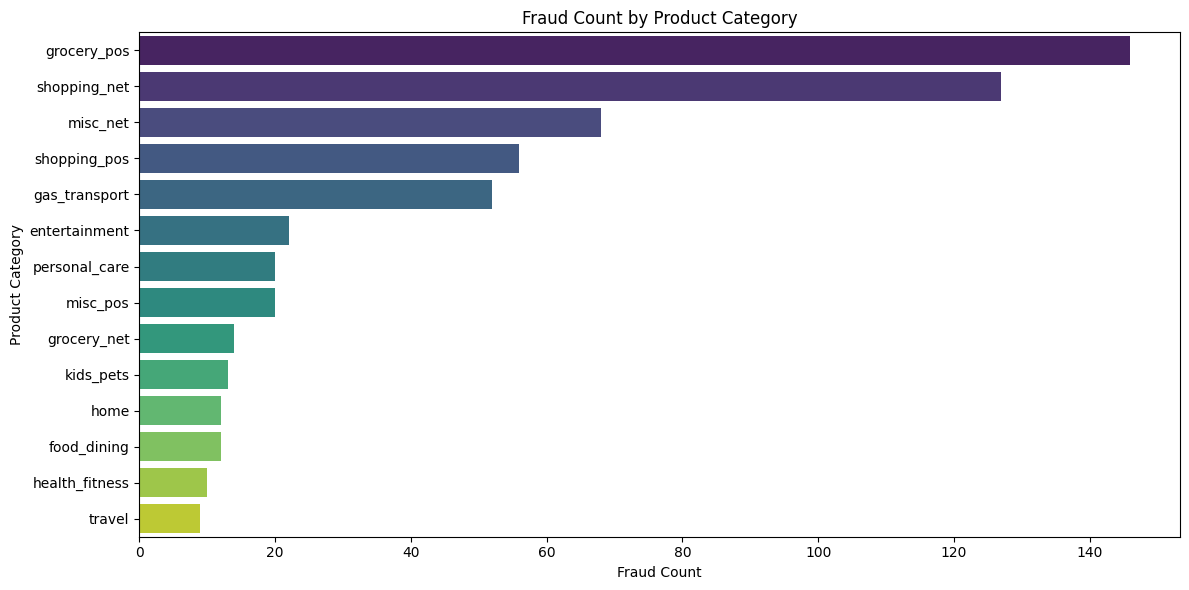

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of fraud counts by category
plt.figure(figsize=(12, 6))
sns.barplot(x='fraud_count', y='category', data=fraud_category_counts, palette='viridis')
plt.title('Fraud Count by Product Category')
plt.xlabel('Fraud Count')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

6. List the total fraud amount for every product category and show the visualization using appropriate graph


In [ ]:
# Filter for fraudulent transactions
fraudulent_transactions = df[df['is_fraud'] == 1]

# Group by category and sum the 'amt' for fraudulent transactions
fraud_amount_by_category = fraudulent_transactions.groupby('category')['amt'].sum().reset_index(name='total_fraud_amount')

# Sort by total fraud amount in descending order
fraud_amount_by_category = fraud_amount_by_category.sort_values('total_fraud_amount', ascending=False)

# Display the total fraud amount per category
print("Total Fraud Amount per Product Category:\n", fraud_amount_by_category)

Total Fraud Amount per Product Category:
           category  total_fraud_amount
11    shopping_net           127277.80
8         misc_net            54062.67
12    shopping_pos            49360.91
4      grocery_pos            45637.42
0    entertainment            11988.59
6             home             2891.24
1      food_dining             1423.87
9         misc_pos             1240.75
2    gas_transport              616.51
10   personal_care              464.70
7        kids_pets              231.75
5   health_fitness              204.63
3      grocery_net              178.97
13          travel               75.46


/tmp/ipython-input-375974474.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_fraud_amount', y='category', data=fraud_amount_by_category, palette='viridis')


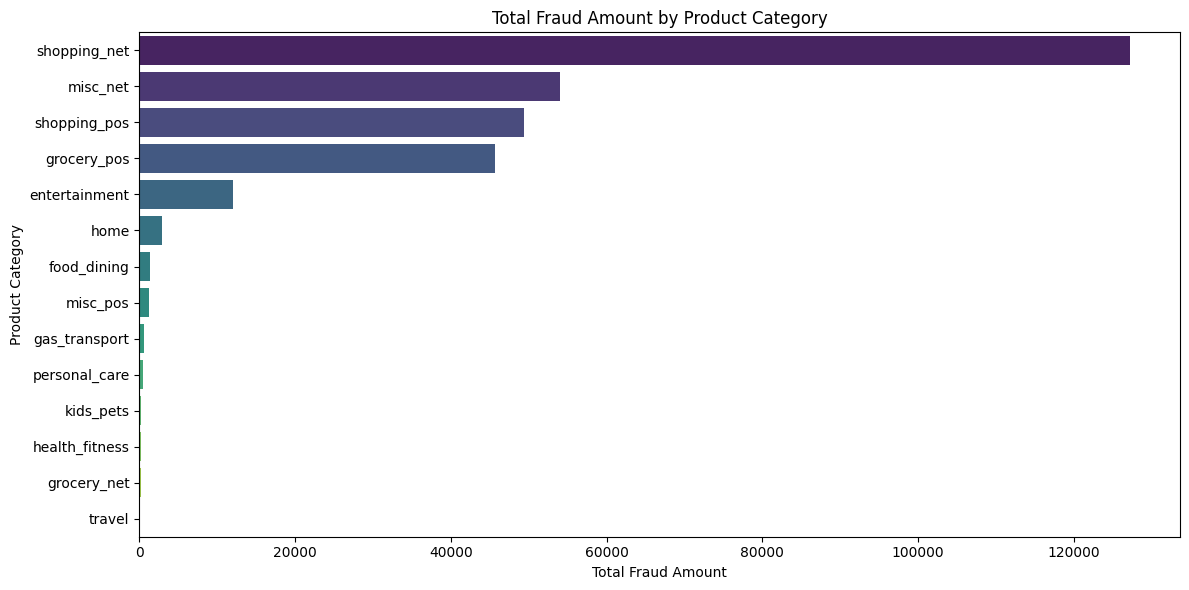

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of total fraud amount by category
plt.figure(figsize=(12, 6))
sns.barplot(x='total_fraud_amount', y='category', data=fraud_amount_by_category, palette='viridis')
plt.title('Total Fraud Amount by Product Category')
plt.xlabel('Total Fraud Amount')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

7. List the total fraud amount for every state and show the visualization using appropriate
graph

In [ ]:
# Filter for fraudulent transactions
fraudulent_transactions = df[df['is_fraud'] == 1]

# Group by state and sum the 'amt' for fraudulent transactions
fraud_amount_by_state = fraudulent_transactions.groupby('state')['amt'].sum().reset_index(name='total_fraud_amount')

# Sort by total fraud amount in descending order
fraud_amount_by_state = fraud_amount_by_state.sort_values('total_fraud_amount', ascending=False)

# Display the total fraud amount per state
print("Total Fraud Amount per State:\n", fraud_amount_by_state)

Total Fraud Amount per State:
    state  total_fraud_amount
2     CA            70546.08
5     MO            40885.49
6     NE            36412.88
11    WY            32394.57
8     OR            29850.83
10    WA            18355.36
3     CO            15534.98
7     NM            14463.42
0     AK            13998.57
9     UT            11501.67
4     ID             6893.94
1     AZ             4817.48


/tmp/ipython-input-367306091.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_fraud_amount', y='state', data=fraud_amount_by_state, palette='viridis')


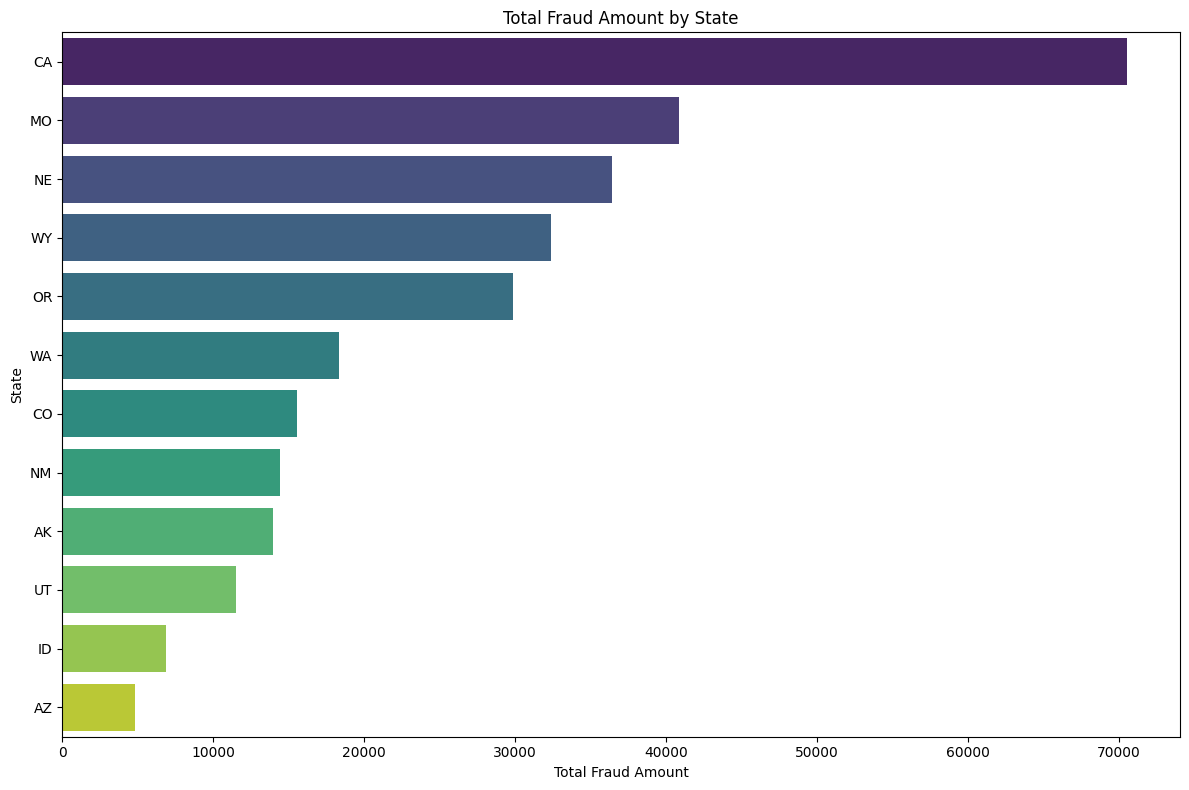

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of total fraud amount by state
plt.figure(figsize=(12, 8))
sns.barplot(x='total_fraud_amount', y='state', data=fraud_amount_by_state, palette='viridis')
plt.title('Total Fraud Amount by State')
plt.xlabel('Total Fraud Amount')
plt.ylabel('State')
plt.tight_layout()
plt.show()

8. Calculate and list total transactions per state and show the visualization using
appropriate graph

In [ ]:
# Group by state and count the total transactions
total_transactions_by_state = df.groupby('state').size().reset_index(name='total_transactions')

# Sort by total transactions in descending order
total_transactions_by_state = total_transactions_by_state.sort_values('total_transactions', ascending=False)

# Display the total transactions per state
print("Total Transactions per State:\n", total_transactions_by_state)

Total Transactions per State:
    state  total_transactions
2     CA               23227
6     MO               15873
7     NE                9963
12    WY                7988
9     OR                7749
11    WA                7723
8     NM                6901
3     CO                5648
10    UT                4426
1     AZ                4395
5     ID                2313
4     HI                1023
0     AK                 884


/tmp/ipython-input-4032416201.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_transactions', y='state', data=total_transactions_by_state, palette='viridis')


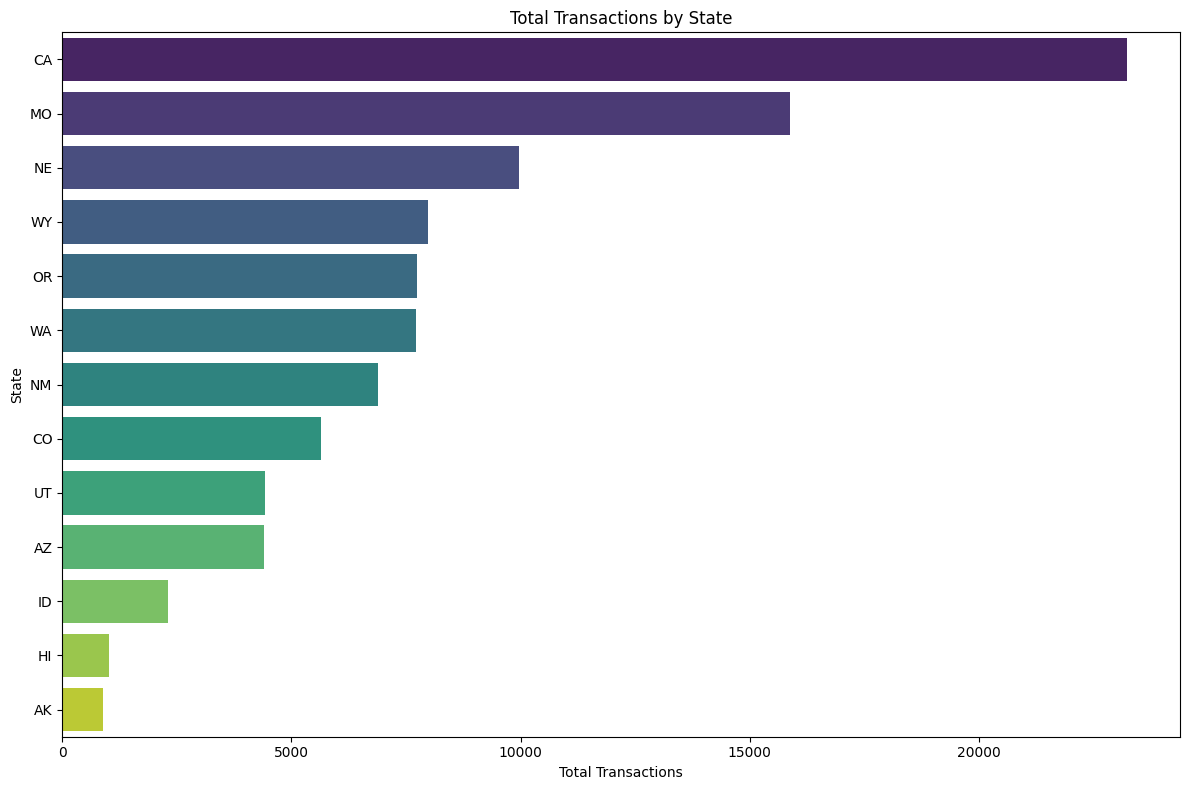

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of total transactions by state
plt.figure(figsize=(12, 8))
sns.barplot(x='total_transactions', y='state', data=total_transactions_by_state, palette='viridis')
plt.title('Total Transactions by State')
plt.xlabel('Total Transactions')
plt.ylabel('State')
plt.tight_layout()
plt.show()

9. Calculate and list total number of fraud transactions per state and show thevisualization using appropriate graph

In [ ]:
# Filter for fraudulent transactions
fraudulent_transactions = df[df['is_fraud'] == 1]

# Group by state and count the total fraudulent transactions
fraud_transactions_by_state = fraudulent_transactions.groupby('state').size().reset_index(name='fraud_transaction_count')

# Sort by fraud transaction count in descending order
fraud_transactions_by_state = fraud_transactions_by_state.sort_values('fraud_transaction_count', ascending=False)

# Display the total fraudulent transactions per state
print("Total Fraud Transactions per State:\n", fraud_transactions_by_state)

Total Fraud Transactions per State:
    state  fraud_transaction_count
2     CA                      138
5     MO                       82
11    WY                       71
6     NE                       65
8     OR                       52
10    WA                       39
3     CO                       29
7     NM                       29
9     UT                       29
0     AK                       27
4     ID                       11
1     AZ                        9


/tmp/ipython-input-599658641.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fraud_transaction_count', y='state', data=fraud_transactions_by_state, palette='viridis')


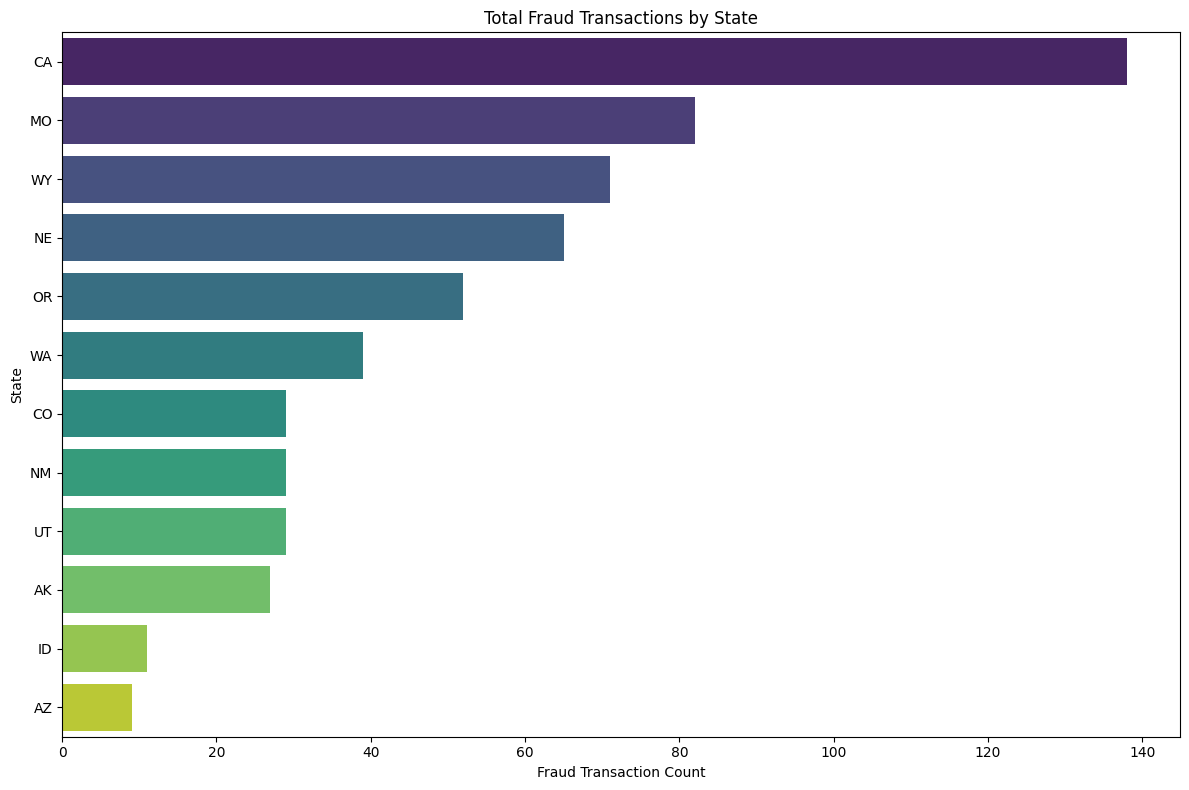

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of total fraud transactions by state
plt.figure(figsize=(12, 8))
sns.barplot(x='fraud_transaction_count', y='state', data=fraud_transactions_by_state, palette='viridis')
plt.title('Total Fraud Transactions by State')
plt.xlabel('Fraud Transaction Count')
plt.ylabel('State')
plt.tight_layout()
plt.show()

10. List state-wise total number of transactions and total number of fraud transactions
(hint: use merge function from pandas library to merge the data frame obtained from
the above 2 steps)

In [ ]:
# Merge the two dataframes on the 'state' column
state_fraud_summary = pd.merge(total_transactions_by_state, fraud_transactions_by_state, on='state', how='left')

# Fill NaN values in fraud_transaction_count with 0 (for states with no fraud)
state_fraud_summary['fraud_transaction_count'] = state_fraud_summary['fraud_transaction_count'].fillna(0).astype(int)

# Display the merged dataframe
print("State-wise Total and Fraud Transactions:\n", state_fraud_summary)

State-wise Total and Fraud Transactions:
    state  total_transactions  fraud_transaction_count
0     CA               23227                      138
1     MO               15873                       82
2     NE                9963                       65
3     WY                7988                       71
4     OR                7749                       52
5     WA                7723                       39
6     NM                6901                       29
7     CO                5648                       29
8     UT                4426                       29
9     AZ                4395                        9
10    ID                2313                       11
11    HI                1023                        0
12    AK                 884                       27


11. List the Fraud Distribution state-wise i.e check how many fraudulent vs non-fraudulent transactions and show the visualization accordingly

In [ ]:
# Group by state and is_fraud to get the counts
fraud_distribution_by_state = df.groupby(['state', 'is_fraud']).size().reset_index(name='count')

# Pivot the table to have states as index and is_fraud values as columns
fraud_distribution_pivot = fraud_distribution_by_state.pivot(index='state', columns='is_fraud', values='count').fillna(0)

# Rename columns for clarity
fraud_distribution_pivot.columns = ['Non-Fraudulent', 'Fraudulent']

# Display the fraud distribution per state
print("Fraud Distribution by State:\n", fraud_distribution_pivot)

Fraud Distribution by State:
        Non-Fraudulent  Fraudulent
state                            
AK              857.0        27.0
AZ             4386.0         9.0
CA            23089.0       138.0
CO             5619.0        29.0
HI             1023.0         0.0
ID             2302.0        11.0
MO            15791.0        82.0
NE             9898.0        65.0
NM             6872.0        29.0
OR             7697.0        52.0
UT             4397.0        29.0
WA             7684.0        39.0
WY             7916.0        71.0


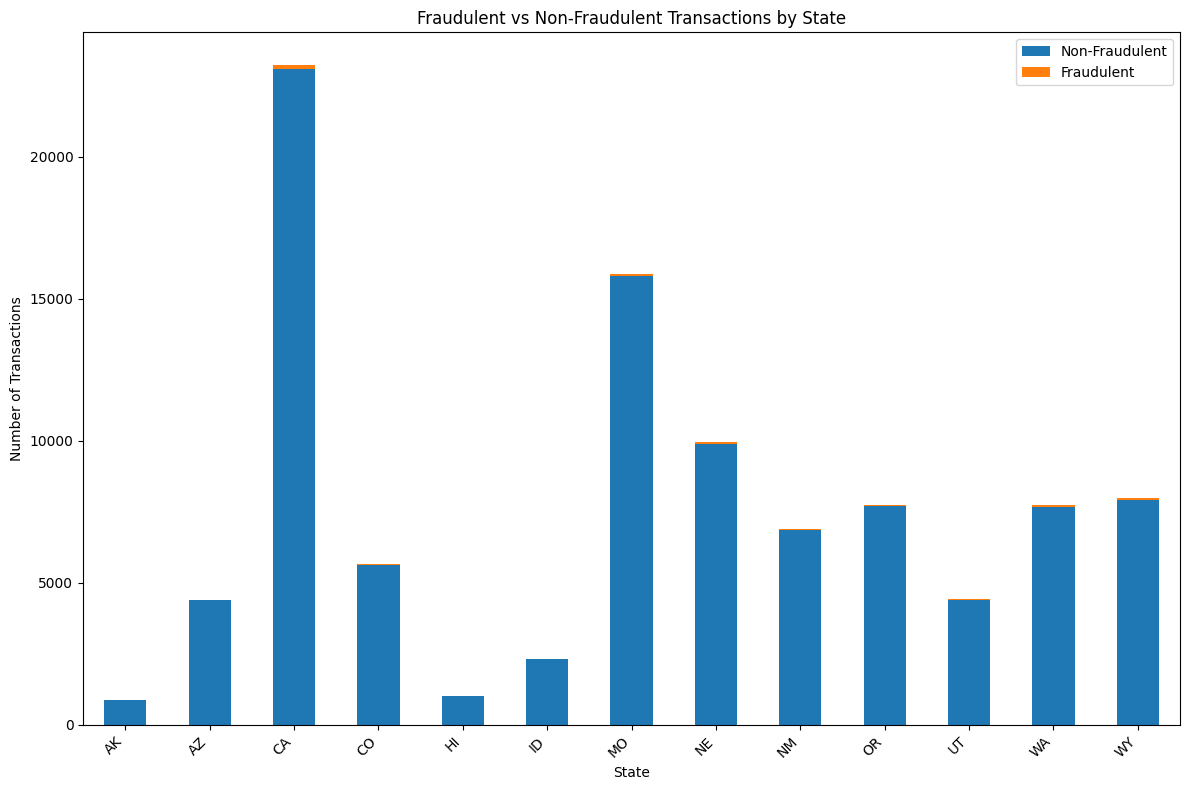

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a stacked bar plot of fraud distribution by state
fraud_distribution_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Fraudulent vs Non-Fraudulent Transactions by State')
plt.xlabel('State')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

12. Calculate and list the fraud rate state-wise (hint: fraud rate = state-wise total number
of fraud transactions / state-wise total number of transactions) and show the
visualization using a bar graph

In [ ]:
# Calculate fraud rate per state
state_fraud_summary['fraud_rate'] = state_fraud_summary['fraud_transaction_count'] / state_fraud_summary['total_transactions']

# Sort by fraud rate in descending order
state_fraud_summary = state_fraud_summary.sort_values('fraud_rate', ascending=False)

# Display the fraud rate per state
print("Fraud Rate per State:\n", state_fraud_summary[['state', 'fraud_rate']])

Fraud Rate per State:
    state  fraud_rate
12    AK    0.030543
3     WY    0.008888
4     OR    0.006711
8     UT    0.006552
2     NE    0.006524
0     CA    0.005941
1     MO    0.005166
7     CO    0.005135
5     WA    0.005050
10    ID    0.004756
6     NM    0.004202
9     AZ    0.002048
11    HI    0.000000


/tmp/ipython-input-929850666.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fraud_rate', y='state', data=state_fraud_summary, palette='viridis')


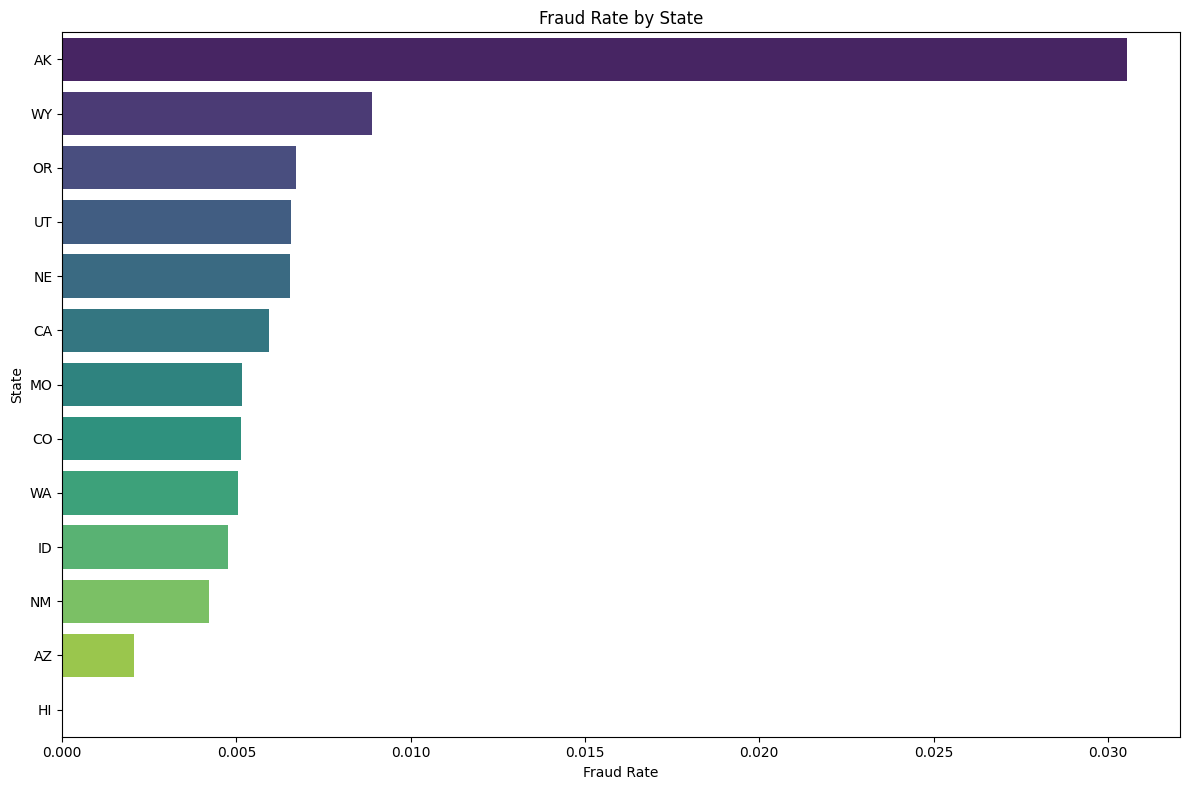

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of fraud rate by state
plt.figure(figsize=(12, 8))
sns.barplot(x='fraud_rate', y='state', data=state_fraud_summary, palette='viridis')
plt.title('Fraud Rate by State')
plt.xlabel('Fraud Rate')
plt.ylabel('State')
plt.tight_layout()
plt.show()